# PyTorch Computer Vision


# 0. Computer vision libraries in PyTorch

* `torchvision` is the base domain library of PyTorch (look at docs)
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can use for your own problems
* `torchvision.transforms` -functions for manipulating your data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data`- Creates Python iterable over a dataset 

In [162]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)



2.6.0+cu126
0.21.0+cu126


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST, hello world in computer vision, from torchvision.datasets

In [163]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download it
    train=True, # Do we want the training dataset
    download= True,
    transform=ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels / targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


In [164]:
len(train_data), len(test_data)

(60000, 10000)

In [165]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [166]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [167]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [168]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [169]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

image shape: torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

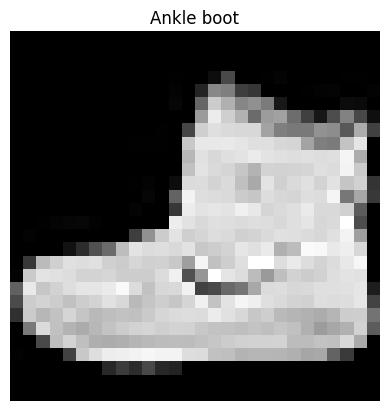

In [170]:
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

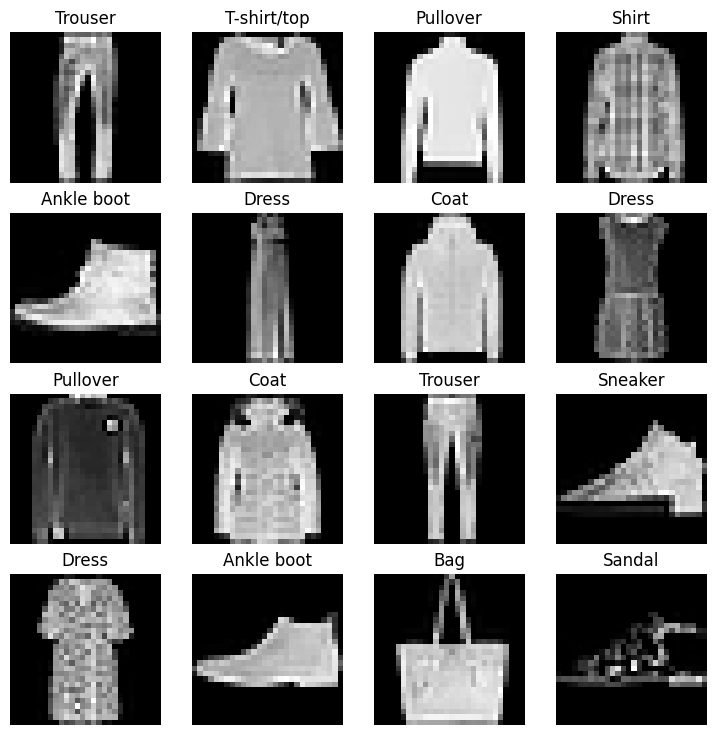

In [171]:
# Plot more images
torch.manual_seed(22)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    #print(random_idx)
    img, lbl = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="grey")
    plt.title(class_names[lbl])
    plt.axis(False)

Do you think this images could be modeled with pure linear lines, or will we need non-linearity?

## 2. Prepare DataLoader

Right now are data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into mini-batches.

Why?

1. It is more computationally efficient, as in, your hardware may not be able to look (store in RAM) at 60000 images in one hit. So we break it into 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch.

For more one mini-batches : (Andrew NG mini-batches youtube)

In [172]:
from torch.utils.data import DataLoader

# Setup the batchsize hyperparamter
BATCH_SIZE  =  32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data, 
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2162b0d6200>,
 <torch.utils.data.dataloader.DataLoader at 0x2162b0d73a0>)

In [173]:
# Let's check what we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002162B0D6200>, <torch.utils.data.dataloader.DataLoader object at 0x000002162B0D73A0>)
Length of the train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [174]:
# Check out what is inside of the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])


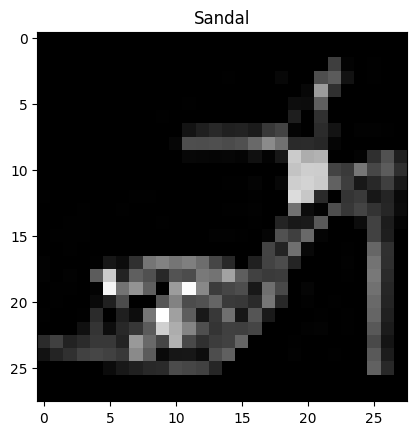

In [175]:
# Show a sample 
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])

print(f"Image size : {img.shape}")
 

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [176]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"shape after: {output.shape}") # one big vector of all values 28 * 28 values

Shape before flattening: torch.Size([1, 28, 28])
shape after: torch.Size([1, 784])


In [177]:
from torch import nn
import torch

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hiden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hiden_units),
            nn.Linear(in_features = hiden_units, out_features=output_shape)

        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    

In [178]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,  # the length when we flatten the image
    hiden_units = 10,
    output_shape=len(class_names) #one for every class

).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [179]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [180]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 setup loss, optimizer and evaluation metrics

* Loss function - multiclass data -> `nn.CrossEntropyLoss`
* Optimizer - `torch.optim.SGD()`
* Evaluation metric - `accuracy`

In [181]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("exists")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


exists


In [182]:
#Import the accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimiuer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)


## 3.2 Create a function to time experiments

Machine learning is very experimental

Two of the main things you'll ofthen want to  track are:
1. Model'a performance (loss and accuracy values etc)
2. How fast it runs

In [183]:
from timeit import default_timer
def print_train_time(start: float,
                     end:float,
                    device : torch.device = None):
    """
    Prints difference between start and end time
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time} seconds")


start_time = default_timer()
# code
end_time = default_timer()

print_train_time(start_time, end_time, "cpu")


Train time on cpu: 1.979999797185883e-05 seconds


### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch* .
3. Loop through testing batches, perform testing steps, calculate the tests loss *per batch*.
4. Print out what's happenin'
5. Time it all.

In [184]:
test_dataloader

In [185]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = default_timer()

# Set the number of epochs
epochs = 5

# Create loops, tqdm just wrap around iterator
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    ### TRaining 
    train_loss = 0
    # Add a loop to loop through the training batches 
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. forward pass
        y_logits = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_logits, y)
        train_loss += loss # Accumulate train loss

        # 3 . Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        #5. Optimizer step
        optimizer.step()

        # print out 
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

    #Divie total trein loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing loop 
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_logits = model_0(X_test)

            # 2. Calculate the loss
            test_loss += loss_fn(test_logits, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred = test_logits.argmax(dim = 1))

        # Caclculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per bathc
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss}, Test loss: {test_loss}, Test acc: {test_acc}")

# Calculate the training time 
train_time_end_on_cpu = default_timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, 
                                            end = train_time_end_on_cpu,
                                              device = str(next(model_0.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 20%|██        | 1/5 [00:07<00:29,  7.49s/it]


Train loss: 0.5903892517089844, Test loss: 0.5095351934432983, Test acc: 82.03873801916933
Epoch: 1
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 40%|████      | 2/5 [00:15<00:22,  7.55s/it]


Train loss: 0.4763319790363312, Test loss: 0.47989004850387573, Test acc: 83.19688498402556
Epoch: 2
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 60%|██████    | 3/5 [00:22<00:15,  7.57s/it]


Train loss: 0.4550333321094513, Test loss: 0.47663894295692444, Test acc: 83.42651757188499
Epoch: 3
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 80%|████████  | 4/5 [00:30<00:07,  7.59s/it]


Train loss: 0.4425109028816223, Test loss: 0.4630562663078308, Test acc: 83.74600638977635
Epoch: 4
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


100%|██████████| 5/5 [00:37<00:00,  7.52s/it]


Train loss: 0.43581557273864746, Test loss: 0.4686938524246216, Test acc: 83.2667731629393
Train time on cpu: 37.59301889999915 seconds


## 4. Make prediciots and get model_0 results

In [200]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device : torch.device = "cpu"):
    """
    Returns a dictionary dontaining the results of model predicting on data_loader.
    """

    loss, acc = 0.0,0.0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y = X.to(device), y.to(device)

            y_pred = model(X)

            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred= y_pred.argmax(dim = 1))


        # Scale the loss and acc

        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, 
            "model_loss": loss.item(),
            "model_acc": acc}# only works where model was created with a class

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn,
                            )

model_0_results

100%|██████████| 313/313 [00:00<00:00, 335.45it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686938524246216,
 'model_acc': 83.2667731629393}

## 5. Setup device agnostic code

In [187]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [188]:
# Create a model with non-linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 in_shape : int, # type hints
                 hidden_units : int,
                 out_shape: int):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_shape),
            nn.ReLU()
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.stack(x)
    
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(28*28, 10, len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [189]:
from helper_functions import accuracy_fn

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)


## 6.2 Creating functions for traning and evaluation/testing
* train - `train_step`
* test - `test_step`

In [190]:
import torch.utils.data.dataloader


def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device:torch.device = device
               ):
    """
    Performs a traning with model trying to learn on data_loader
    """
    
    train_loss, train_acc = 0,0

    #Put model to train mode
    model.train()

    # Add a loop to loop through the training batches 
    for batch, (X, y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
    
        # 1. forward pass
        y_logits = model(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_logits, y)
        train_loss += loss # Accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred = y_logits.argmax(dim = 1)) # go from logits -> prediction labels

        # 3 . Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        #5. Optimizer step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n" )


In [191]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.dataloader,
              loss_fn: torch.nn,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader"""
    
    loss, acc = 0,0

    # Put the model in test mode
    model.eval()
    with torch.inference_mode():
        for (X, y) in data_loader:
            # Move data to device
            X = X.to(device)
            y = y.to(device)

            # Inference (output raw logits)
            y_logits = model(X)

            # Calculate the loss
            loss += loss_fn(y_logits, y)
            acc += accuracy_fn(y, y_logits.argmax(dim = 1)) # logits to prediction labels

        # Adjust metreics (has to be inside the context manager)
        loss /= len(data_loader)
        acc /= len(data_loader)

        print(f"\nTest loss: {loss:.2f} | Test acc: {acc:.2f} %\n")

In [ ]:
# Training 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Training loop
epochs = 3

# Measure time 
start_time_on_gpu = default_timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

    test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)
    

end_time_on_gpu = default_timer()
total_train_time_model_1= print_train_time(start_time_on_gpu, end_time_on_gpu, device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0


Train loss: 1.09199 | Train acc: 61.34%



 20%|██        | 1/5 [00:11<00:45, 11.25s/it]


Test loss: 0.96 | Test acc: 65.00 %

Epoch: 1


Train loss: 0.78101 | Train acc: 71.93%



 40%|████      | 2/5 [00:23<00:35, 11.77s/it]


Test loss: 0.72 | Test acc: 73.91 %

Epoch: 2


Train loss: 0.67027 | Train acc: 75.94%



 60%|██████    | 3/5 [00:34<00:22, 11.50s/it]


Test loss: 0.69 | Test acc: 75.02 %

Epoch: 3


Train loss: 0.64384 | Train acc: 76.52%



 80%|████████  | 4/5 [00:45<00:11, 11.38s/it]


Test loss: 0.65 | Test acc: 76.13 %

Epoch: 4


Train loss: 0.62892 | Train acc: 77.00%



100%|██████████| 5/5 [00:57<00:00, 11.56s/it]


Test loss: 0.65 | Test acc: 75.95 %

Train time on cuda: 56.72176059999765 seconds


In [194]:
print(model_0_results, total_train_time_model_0)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4686938524246216, 'model_acc': 83.2667731629393} None


**Note** Sometimes, depending on your data/hardwere you might find that your model trains faster on CPU than GPU.

Why?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms of compute capability that the GPU (very rarely).

Article, how to make performance faster - Making deep learning go Brrr

In [202]:
# GEt model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

100%|██████████| 313/313 [00:01<00:00, 230.24it/s]


In [203]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6527653932571411,
 'model_acc': 75.94848242811501}

## Model 2: Building a CNN

CNN explainer website - to find out what is happening inside a CNN

Also knows as ConvNets

Known for finding patterns in visual data
